In [26]:
import warnings
warnings.filterwarnings(action='ignore')
import numpy as np
import pandas as pd
%matplotlib notebook
import matplotlib.pyplot as plt

ImportError: Failed to import any qt binding

In [20]:
# class to manage bandits
class BanditGenerator:
    def __init__(self, k=10, n_bandits=2000):
        self.bandits = list()
        for _ in range(n_bandits):
            self.bandits.append(np.random.normal(0, 1, size=k))
        
    def __len__(self):
        return len(self.bandits)
    
    def __getitem__(self, idx):
        return self.bandits[idx]

In [21]:
bandits = BanditGenerator(k=10, n_bandits=2000)

In [22]:
print(bandits[0])

[ 0.12015027  0.68812988  1.05903344  0.6001711   1.79816598 -0.28077261
 -1.70206088 -0.03853187  1.04169526  0.71435074]


In [23]:
def epsilon_greedy(bandit, epsilon=0.01):
    # make dataframe to store the results
    results = {'total reward': [],
               'optimal action': []
               }
    estimated_q = [0.]*10
    n_selected = [0]*10

    total_reward = 0.
    bandit = bandits[0]
    optimal = np.argmax(bandit)

    # epsilon-greedy search    
    for it in range(1000):
        # let's try the first few runs
        if it < 10:
            action = it
        else:
            if np.random.random() < epsilon:
                action = np.random.randint(0, 9)
            else:
                action = np.argmax(estimated_q)

        reward = np.random.normal(bandit[action], 1)

        n_selected[action] += 1
        if n_selected[action] == 0:
            estimated_q[action] = reward
        else:
            estimated_q[action] += (1./n_selected[action])*(reward - estimated_q[action])

        total_reward += reward
        results['total reward'].append(total_reward)       
        if action == optimal:
            results['optimal action'].append(True)
        else:
            results['optimal action'].append(False)

    df = pd.DataFrame(results)
    df['average reward'] = 0.
    df['optimal fraction'] = 0.
    
    for idx in range(len(df)):
        df['average reward'][idx] = df['total reward'][idx] / (idx+1)
        df['optimal fraction'] = sum(df['optimal action'].values[:idx+1]) / (idx+1)
    return df[['average reward', 'optimal fraction']].copy()

In [24]:
results_greedy = []
results_egreedy_01 = []
results_egreedy_001 = []
for bandit in bandits[:5]:
    df_greedy = epsilon_greedy(bandit, epsilon=0.)
    df_egreedy_01 = epsilon_greedy(bandit, epsilon=0.1)
    df_egreedy_001 = epsilon_greedy(bandit, epsilon=0.01)
    results_greedy.append(df_greedy.values)
    results_egreedy_01.append(df_egreedy_01.values)
    results_egreedy_001.append(df_egreedy_001.values)
    
    del df_greedy, df_egreedy_01, df_egreedy_001

results_greedy = np.array(results_greedy)
results_greedy = np.transpose(np.mean(results_greedy, axis=0))
results_egreedy_01 = np.array(results_egreedy_01)
results_egreedy_01 = np.transpose(np.mean(results_egreedy_01, axis=0))
results_egreedy_001 = np.array(results_egreedy_001)
results_egreedy_001 = np.transpose(np.mean(results_egreedy_001, axis=0))

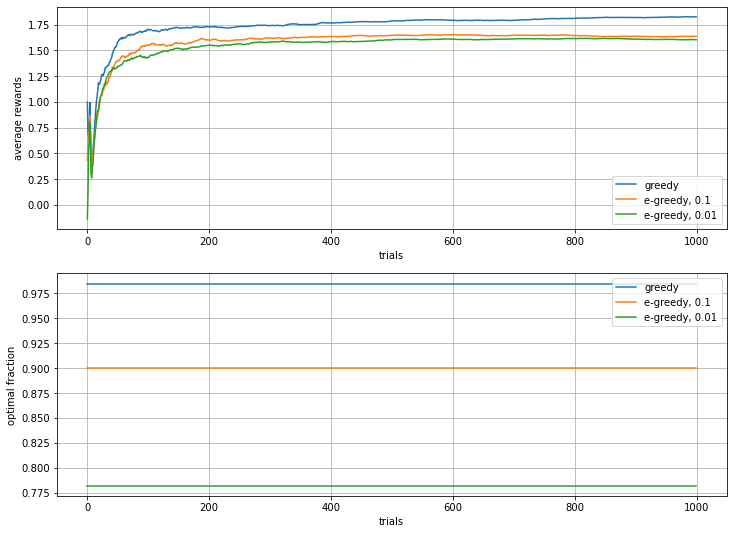

In [25]:
plt.figure(figsize=(12, 9))
plt.subplot(2, 1, 1)
plt.plot(range(1000), results_greedy[0], label="greedy")
plt.plot(range(1000), results_egreedy_01[0], label="e-greedy, 0.1")
plt.plot(range(1000), results_egreedy_001[0], label="e-greedy, 0.01")
plt.xlabel("trials")
plt.ylabel("average rewards")
plt.grid(True)
plt.legend(loc='best')

plt.subplot(2, 1, 2)
plt.plot(range(1000), results_greedy[1], label="greedy")
plt.plot(range(1000), results_egreedy_01[1], label="e-greedy, 0.1")
plt.plot(range(1000), results_egreedy_001[1], label="e-greedy, 0.01")
plt.xlabel("trials")
plt.ylabel("optimal fraction")
plt.grid(True)
plt.legend(loc='best')

plt.show()